# Introduction

Mutluluk, bir ülkenin genel refah seviyesini belirleyen önemli göstergelerden biridir. Ekonomik, sosyal ve psikolojik faktörler, bireylerin mutluluk seviyelerini doğrudan etkiler. Dünya Mutluluk Raporu 2024, farklı ülkelerdeki mutluluk seviyelerini analiz ederek, bu mutluluğu belirleyen temel faktörleri ortaya koymaktadır.

Bu veri setinde, ülkelerin mutluluk düzeylerini etkileyen kişi başına düşen GSYİH, sosyal destek, yaşam süresi, özgürlük, cömertlik ve yolsuzluk algısı gibi göstergeler yer almaktadır.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [missing values](#2)
1. [Variable Description](#3)
    * [Variable Analysis](#4)
    * [Relationship Between Features](#5)
1. [Happiness Score by Region](#6)
1. [Life Ladder Comparison by Contries and Years](#7)

In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


<a id = "1"></a><br>
# Load and Check Data

In [180]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv',encoding= "ISO-8859-1")
df2 = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv',encoding= "ISO-8859-1")

In [99]:
df.head()  # İlk 5 satırı gösterir

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [215]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,2014.763860,5.483566,9.397139,0.809705,63.424639,0.749765,0.001603,0.744338,0.651691,0.273166
std,5.059436,1.125522,1.151189,0.121002,6.808815,0.139053,0.159973,0.181827,0.106013,0.086998
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.504000,0.744000,59.280000,0.659500,-0.109000,0.688000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.835667,65.100000,0.770000,-0.018000,0.797000,0.663000,0.262000
75%,2019.000000,6.323500,10.390000,0.904000,68.567500,0.861000,0.095000,0.865000,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


<a id = "2"></a><br>
### missing values

In [218]:

missing_values = df2.isnull().sum()

missing_values = missing_values[missing_values > 0]

print("Eksik Veriler:\n", missing_values)


Eksik Veriler:
 Series([], dtype: int64)


In [217]:

missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

print("Eksik Veriler:\n", missing_values)


Eksik Veriler:
 Series([], dtype: int64)


In [216]:
from sklearn.impute import KNNImputer

# 1️⃣ Sayısal sütunları seçelim
num_cols_df = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_df2 = df2.select_dtypes(include=['float64', 'int64']).columns

# 2️⃣ Sadece sayısal sütunları içeren DataFrame'leri oluştur
df_numeric = df[num_cols_df]
df2_numeric = df2[num_cols_df2]

# 3️⃣ KNN İmputer Modelini Tanımla (k = 3)
imputer = KNNImputer(n_neighbors=3)

# 4️⃣ KNN Modelini Kullanarak Eksik Değerleri Doldur
df_filled = imputer.fit_transform(df_numeric)
df2_filled = imputer.fit_transform(df2_numeric)

# 5️⃣ Eksik verileri doldurulmuş olan verileri geri atayalım
df[num_cols_df] = df_filled
df2[num_cols_df2] = df2_filled

# Eksik veri kontrolü sonrası
print("\nEksik Veri Sayıları (df Sonrası):\n", df.isnull().sum())
print("\nEksik Veri Sayıları (df2 Sonrası):\n", df2.isnull().sum())



Eksik Veri Sayıları (df Sonrası):
 Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

Eksik Veri Sayıları (df2 Sonrası):
 Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


<a id = "3"></a><br>
# Variable Description

1. Country name : Ülkenin adı.
1. year : Verinin ait olduğu yıl.
1. Life Ladder : Ülkedeki ortalama mutluluk skoru (0-10 arasında).
1. Log GDP per capita : Kişi başına düşen GSYİHnın (Gayri Safi Yurt İçi Hasıla) logaritmik değeri.
1. Social support : İnsanların zor zamanlarında aileleri veya arkadaşlarından destek alıp almadığını gösteren skor (0-1 arasında).
1. Healthy life expectancy at birth : Doğumda beklenen sağlıklı yaşam süresi (yıl olarak).
1. Freedom to make life choices : İnsanların hayatlarıyla ilgili karar verme özgürlüğü hissi (0-1 arasında).
1. Generosity : Toplumdaki cömertlik düzeyi (bağış yapma ve yardımlaşma eğilimi).
1. Perceptions of corruption : İnsanların ülkelerindeki hükümette ve iş dünyasında yolsuzluk olup olmadığına dair algısı (0-1 arasında).
1. Positive affect : İnsanların günlük olarak ne kadar olumlu duygular hissettiği (mutluluk, gülümseme vb.).
1. Negative affect : İnsanların günlük olarak ne kadar olumsuz duygular hissettiği (stres, üzüntü, öfke vb.).

<a id = "4"></a><br>
# Variable Analysis

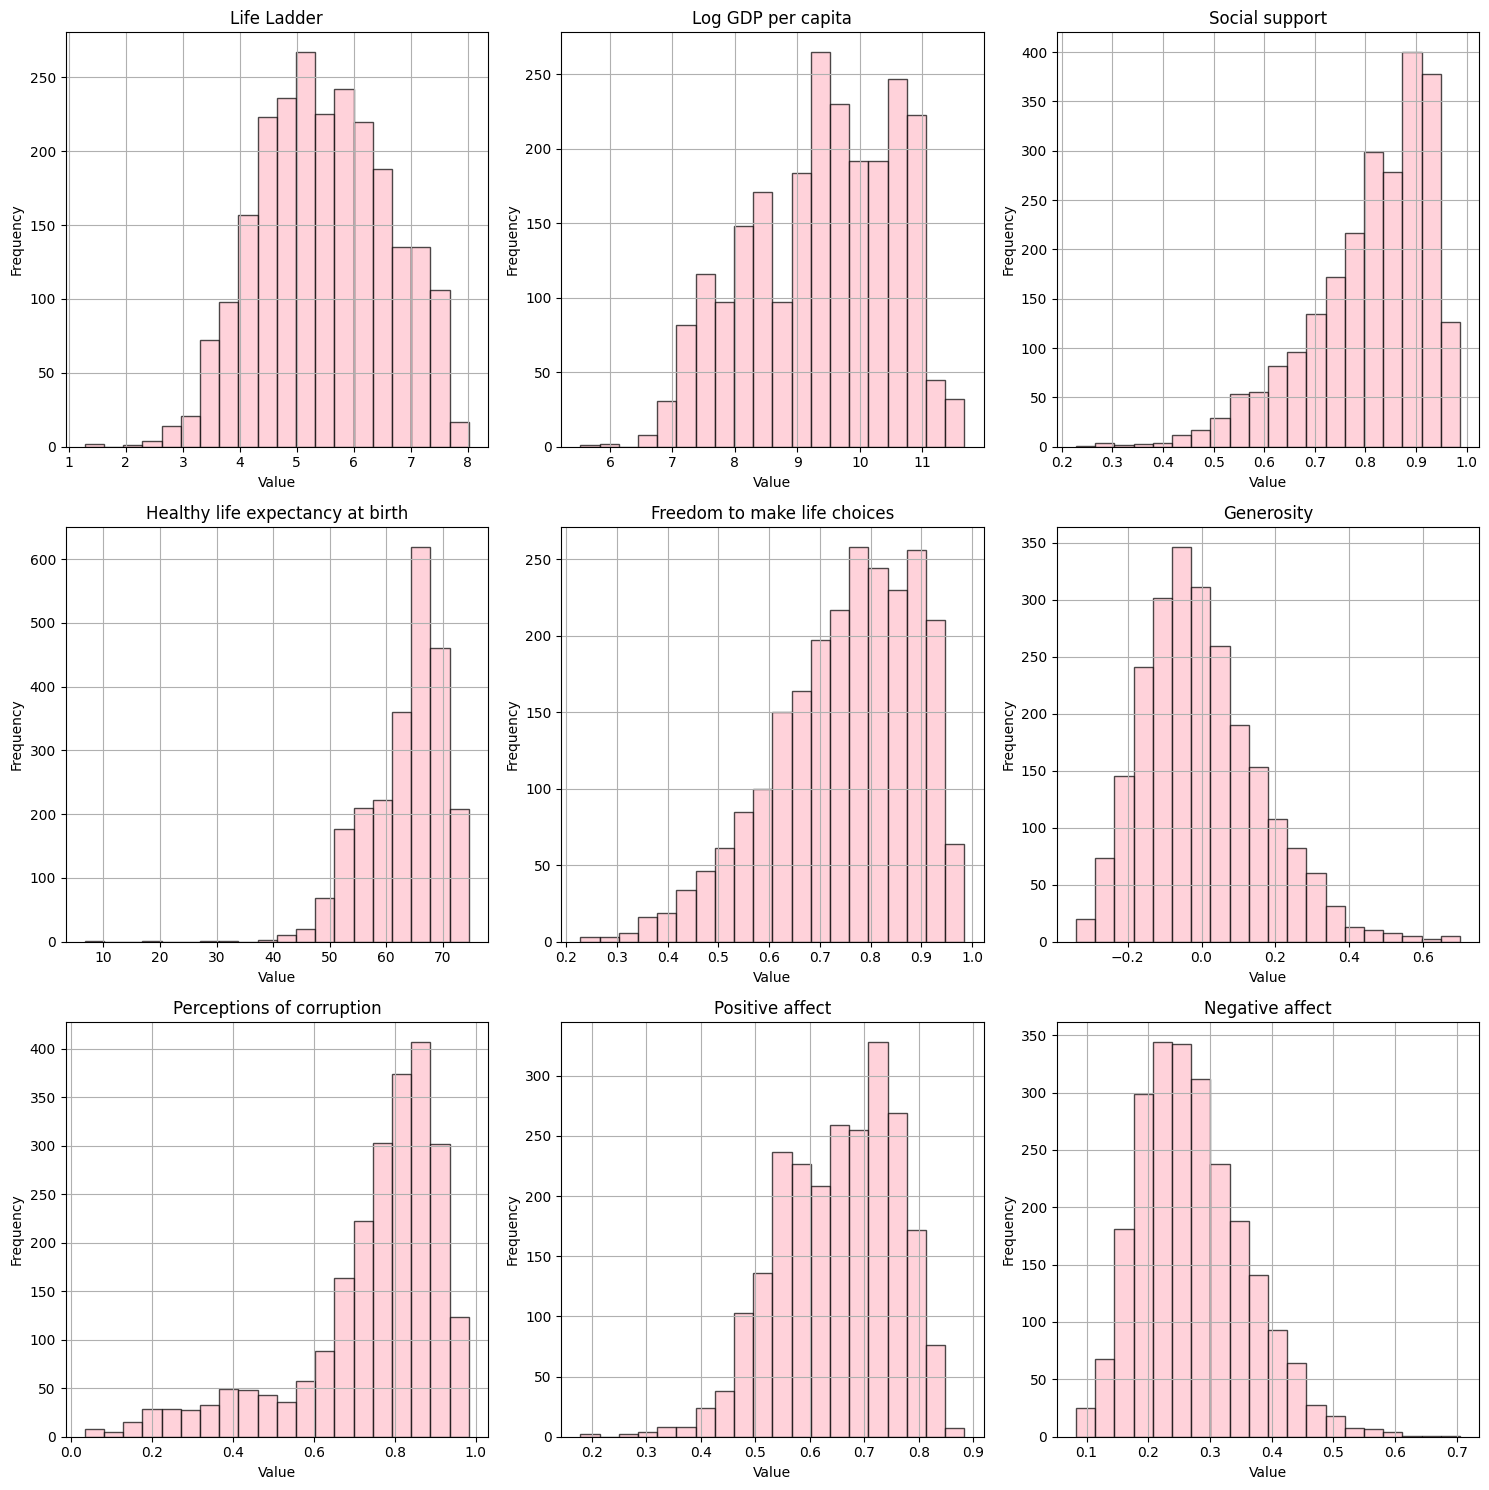

In [209]:

num_vars = ["Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
            "Freedom to make life choices", "Generosity", "Perceptions of corruption", 
            "Positive affect", "Negative affect"]

num_cols = 3
num_rows = (len(num_vars) // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))


for i, var in enumerate(num_vars):
    row = i // num_cols
    col = i % num_cols
    df[var].hist(ax=axes[row, col], bins=20, color='pink', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

### burada her bir değişkenin değerlerini, sıklığını ve outlier değerleri görebiliyoruz

<a id = "5"></a><br>
# Relationship Between Features

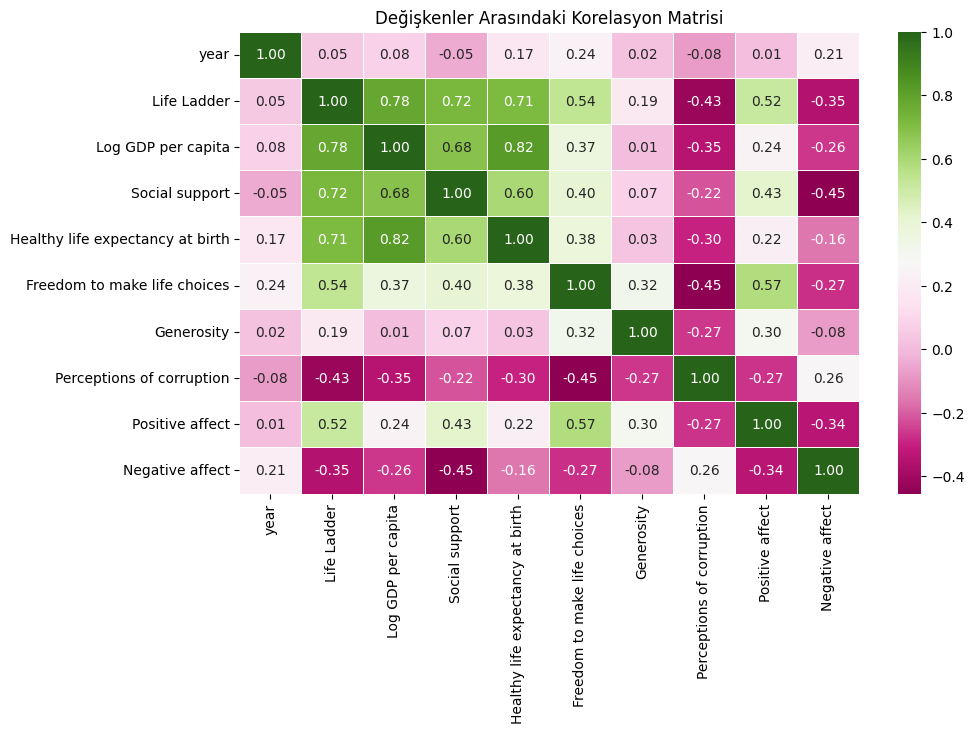

In [210]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            continue
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="PiYG", fmt=".2f", linewidths=0.5)
plt.title("Değişkenler Arasındaki Korelasyon Matrisi")
plt.show()

### burada her bir değişkenin birbiriyle ilişkisini görebiliyoruz. 1e yakın olması çok ilişkili, 0a yakın olması az ilişkili, negatif olması negatif ilişliki olduğu anlamına gelir(ters orantı gibi)

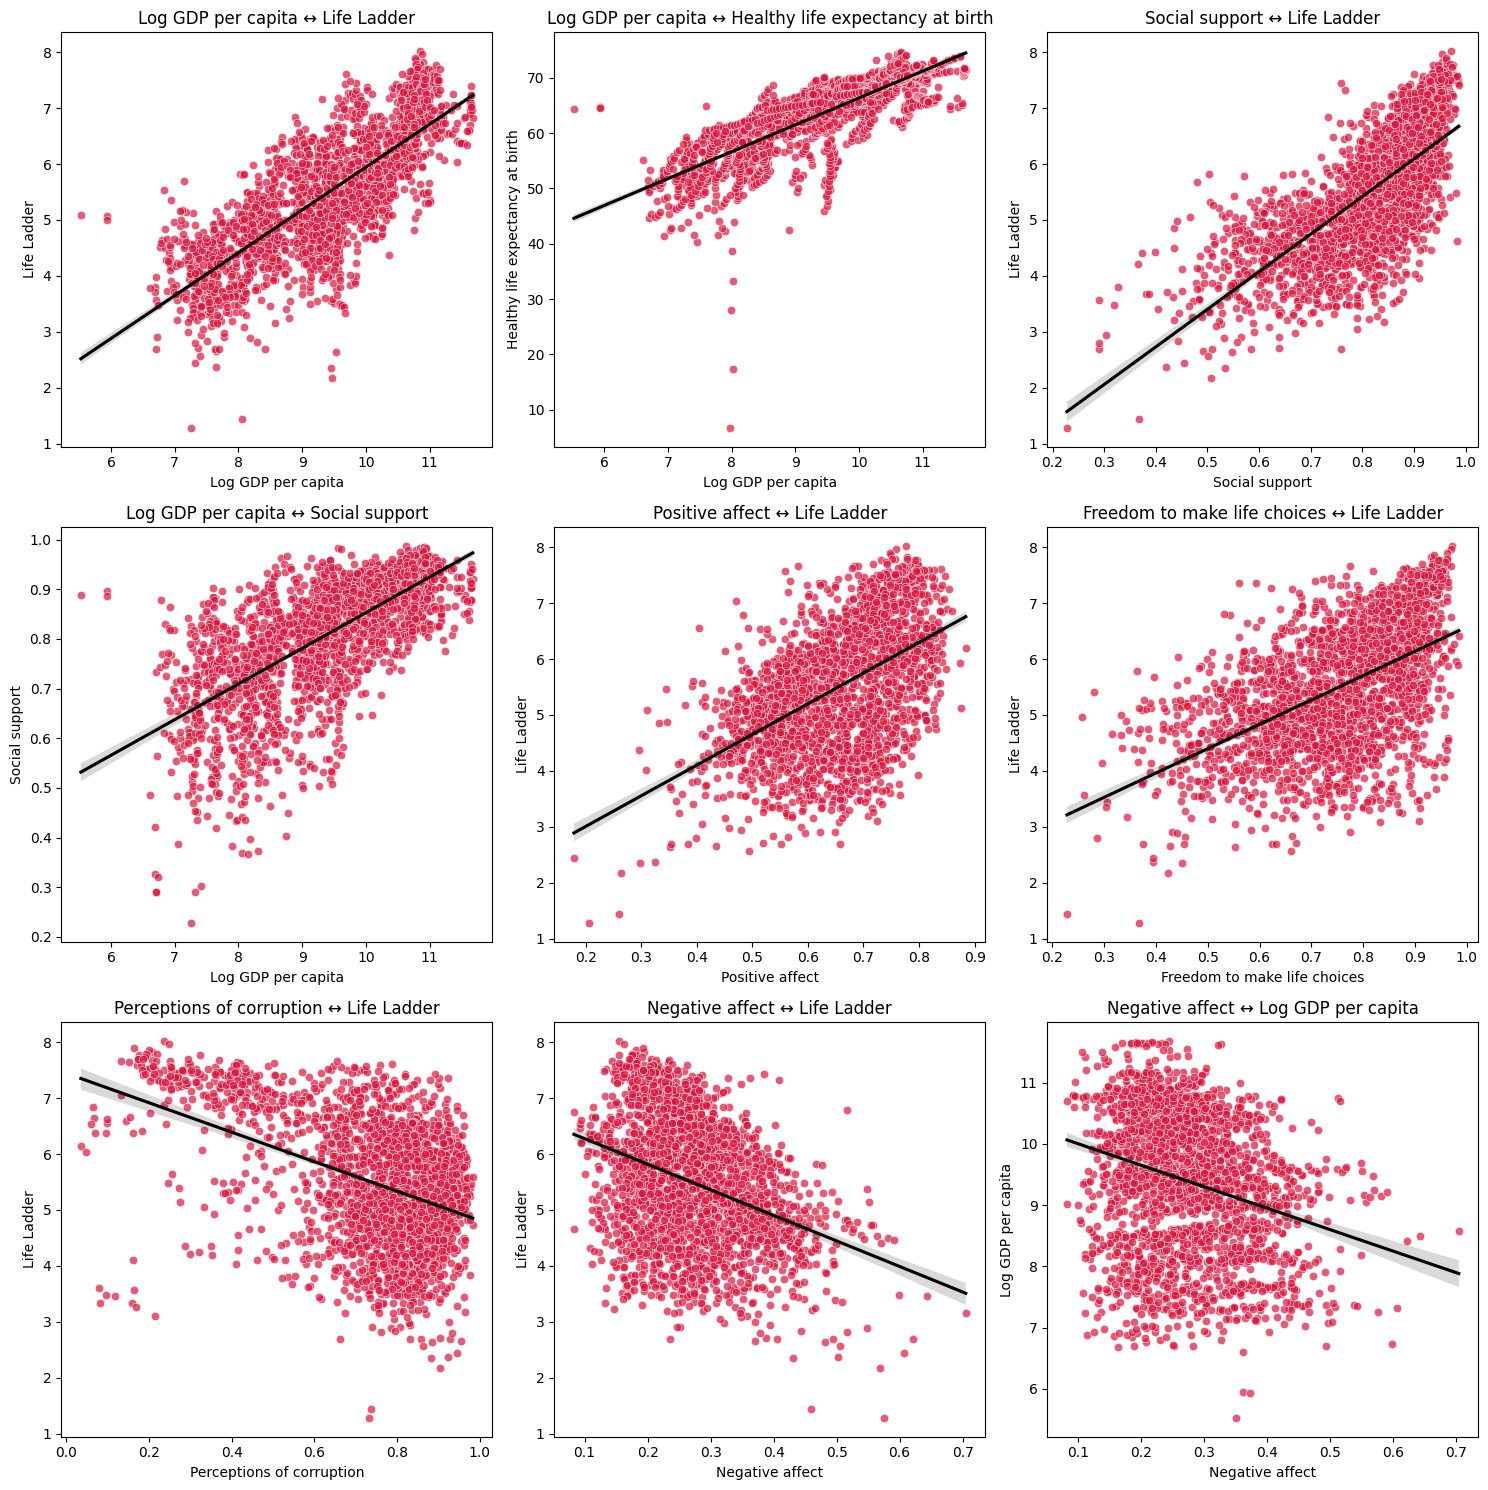

In [211]:
#  sütun adları ve dataframe kaynakları
high_corr_pairs = [
    ("Log GDP per capita", "Life Ladder", df),
    ("Log GDP per capita", "Healthy life expectancy at birth", df),
    ("Social support", "Life Ladder", df),
    ("Log GDP per capita", "Social support", df),
    ("Positive affect", "Life Ladder", df),
    ("Freedom to make life choices", "Life Ladder", df),
    ("Perceptions of corruption", "Life Ladder", df),
    ("Negative affect", "Life Ladder", df),
    ("Negative affect", "Log GDP per capita", df)
]

num_plots = len(high_corr_pairs)
num_cols = 3
num_rows = int(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Scatter plot çizme
for i, (x_var, y_var, dataset) in enumerate(high_corr_pairs):
    row, col = divmod(i, num_cols)  # Satır ve sütun indekslerini hesapla
    ax = axes[row, col]
    
    sns.scatterplot(data=dataset, x=x_var, y=y_var, ax=ax, color="crimson", alpha=0.7)
    sns.regplot(data=dataset, x=x_var, y=y_var, ax=ax, scatter=False, color="black")
    ax.set_title(f"{x_var} ↔ {y_var}")
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)

plt.tight_layout()
plt.show()



## 📊 Korelasyon Grafikleri ve Açıklamaları

### 1️⃣ Log GDP per capita ↔ Life Ladder (0.77)
- Zengin ülkeler genellikle daha mutlu.
- Kişi başına düşen GSYİH yükseldikçe, mutluluk seviyesi artma eğiliminde.

### 2️⃣ Log GDP per capita ↔ Healthy life expectancy (0.81)
- Ekonomik gelişmişlik, uzun yaşam süresiyle bağlantılı.
- Daha yüksek gelirli ülkelerde sağlık hizmetlerine erişim daha iyi olduğu için yaşam süresi artıyor.

### 3️⃣ Social support ↔ Life Ladder (0.72)
- Sosyal destek arttıkça mutluluk yükseliyor.
- Güçlü sosyal bağlara sahip toplumlar, daha mutlu bireylerden oluşuyor.

### 4️⃣ Log GDP per capita ↔ Social support (0.67)
- Zengin ülkelerde sosyal destek daha fazla.
- Ekonomik refah, insanlar arasında daha güçlü sosyal yardımlaşmayı teşvik edebilir.

### 5️⃣ Positive affect ↔ Life Ladder (0.51)
- Daha mutlu insanlar, daha fazla pozitif duygu yaşıyor.
- Hayattan memnun olan bireyler, günlük yaşamda daha fazla pozitif deneyim yaşama eğiliminde.

### 6️⃣ Freedom to make life choices ↔ Life Ladder (0.54)
- İnsanlar özgürlük hissettikçe daha mutlu.
- Kendi yaşamları hakkında karar verme yeteneği olan bireyler, daha yüksek mutluluk seviyelerine sahip olabilir.

### 7️⃣ Perceptions of corruption ↔ Life Ladder (-0.42)
- Yolsuzluk algısı arttıkça mutluluk düşüyor.
- İnsanlar, hükümetlerine ve sistemlerine güvenmediklerinde daha mutsuz olabiliyorlar.

### 8️⃣ Negative affect ↔ Life Ladder (-0.45)
- Olumsuz duygular arttıkça mutluluk azalıyor.
- Stres, üzüntü ve öfke gibi olumsuz duyguların yüksek olduğu yerlerde mutluluk seviyeleri düşüyor.

### 9️⃣ Negative affect ↔ Log GDP per capita (-0.45)
- Zengin ülkelerde negatif duygular daha düşük.
- Ekonomik olarak gelişmiş ülkelerde bireylerin stres seviyeleri daha düşük olabilir.


<a id = "6"></a><br>
#  Happiness Score by Region 

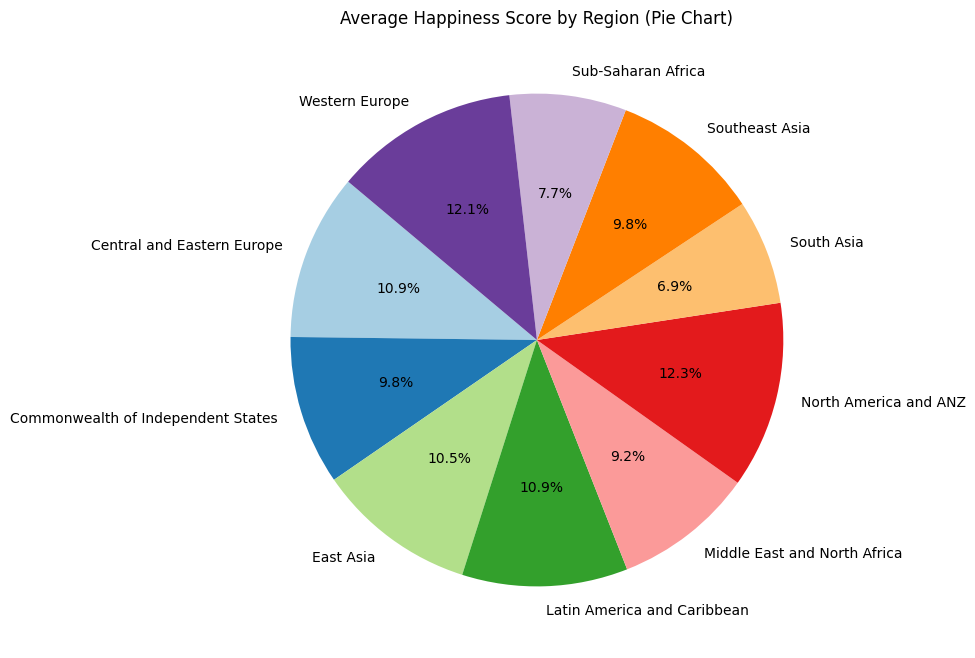

In [190]:
region_happiness = df2.groupby("Regional indicator")["Ladder score"].mean()

plt.figure(figsize=(12,8))
plt.pie(region_happiness, labels=region_happiness.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Average Happiness Score by Region (Pie Chart)")
plt.show()

### 2024 verilerini baz alarak bölgelere göre mutluluk oranı, aslında mutluluk oranları ortalama olarak birbirine çok yakın

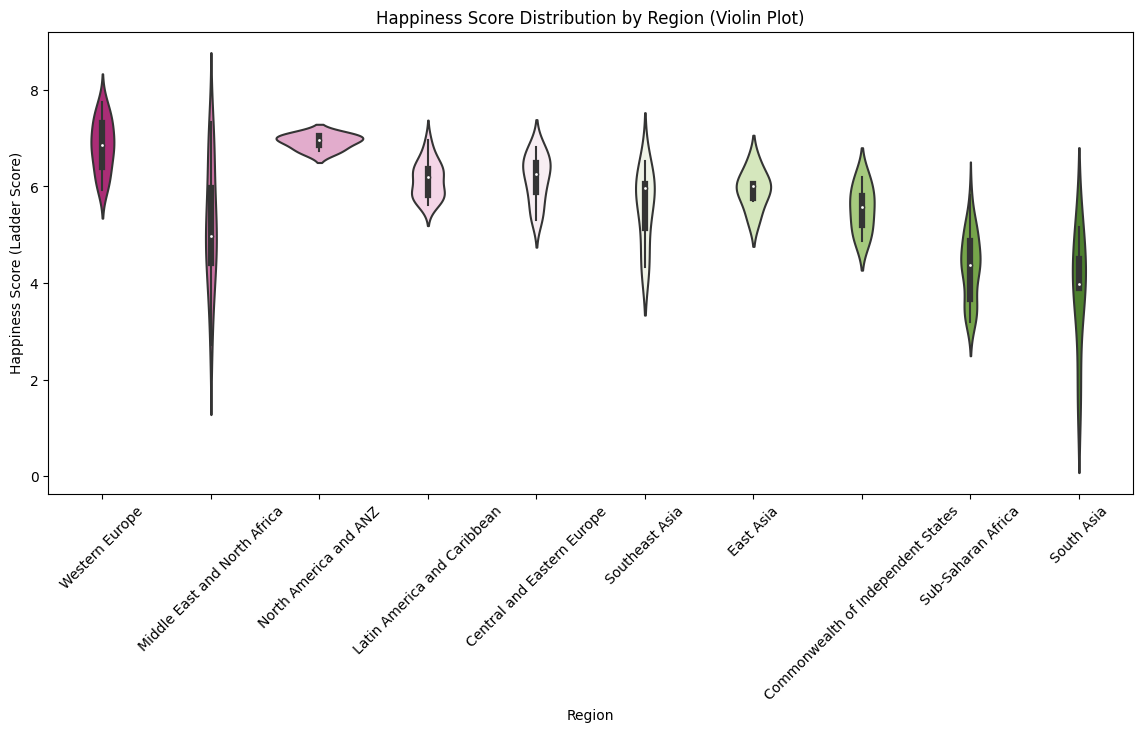

In [206]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df2, x="Regional indicator", y="Ladder score", palette="PiYG")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Happiness Score (Ladder Score)")
plt.title("Happiness Score Distribution by Region (Violin Plot)")
plt.show()


### ama sadece pie plot'a değil Dağılımlarına da baktığımızda bölgelere göre oluşan orantısızlıkları da görebiliyoruz. bazı bölgeler çoğunlukla yüksek mutluluk seviyesine sahipken, bazı bölgelerin ise içinde çok düşük mutluluk seviyelerine sahip ülkeler de barındırdığını görebiliyoruz

<a id = "7"></a><br>
# Life Ladder Comparison by Contries and Years

In [212]:
fig = px.choropleth(df.sort_values('year'), 
                    locations = 'Country name',
                    color ='Life Ladder',
                    locationmode = 'country names',
                    animation_frame = 'year')
fig.update_layout(title = 'Life Ladder Comparison by Contries' )

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



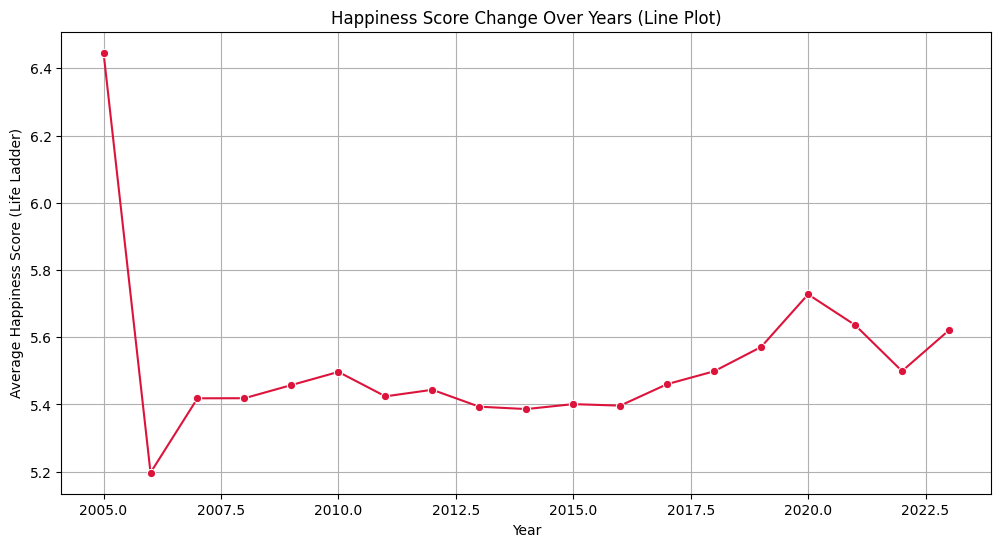

In [184]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_happiness, x="year", y="Life Ladder", marker="o", linestyle="-", color="crimson")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score (Life Ladder)")
plt.title("Happiness Score Change Over Years (Line Plot)")
plt.grid(True)
plt.show()


### ilk yıllardaki veriler yanıltıcı olablir. ilk yıllarda çok fazla ülkenin verisi yok elimizde

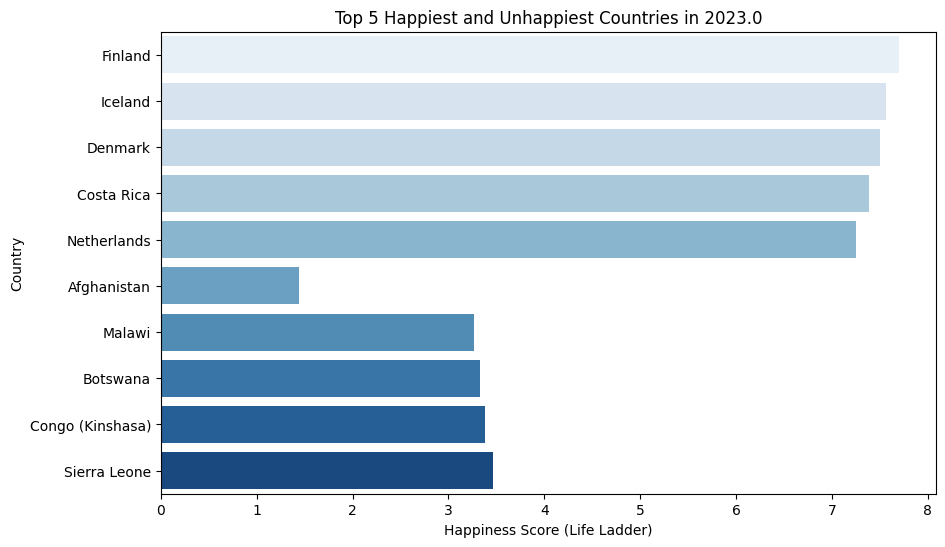

In [183]:
latest_year = df["year"].max()

df_latest = df[df["year"] == latest_year]

top_5_happy = df_latest.nlargest(5, "Life Ladder")
bottom_5_happy = df_latest.nsmallest(5, "Life Ladder")

happiness_df = pd.concat([top_5_happy, bottom_5_happy])

if happiness_df.empty:
    print(f"No valid data found for the latest year ({latest_year}).")
else:
    # Bar Plot çizme
    plt.figure(figsize=(10,6))
    sns.barplot(data=happiness_df, x="Life Ladder", y="Country name", palette="Blues")
    plt.xlabel("Happiness Score (Life Ladder)")
    plt.ylabel("Country")
    plt.title(f"Top 5 Happiest and Unhappiest Countries in {latest_year}")
    plt.show()
